In [169]:
import pandas as pd
import numpy as np
from IVClassification import *
import wooldridge as woo
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import matplotlib.pyplot as plt

In [170]:
mroz = woo.dataWoo('mroz')
mroz.describe()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,428.000000,753.000000,753.000000,753.000000,...,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.00000,753.000000,428.000000,753.000000
mean,0.568393,740.576361,0.237716,1.353254,42.537849,12.286853,4.177682,1.849734,2267.270916,45.120850,...,23080.594954,0.678863,9.250996,8.808765,8.623506,0.642762,10.63081,20.128964,1.190173,178.038513
std,0.495630,871.314216,0.523959,1.319874,8.072574,2.280246,3.310282,2.419887,595.566649,8.058793,...,12190.202026,0.083496,3.367468,3.572290,3.114934,0.479504,8.06913,11.634797,0.723198,249.630849
min,0.000000,0.000000,0.000000,0.000000,30.000000,5.000000,0.128200,0.000000,175.000000,30.000000,...,1500.000000,0.441500,0.000000,0.000000,3.000000,0.000000,0.00000,-0.029057,-2.054164,0.000000
25%,0.000000,0.000000,0.000000,0.000000,36.000000,12.000000,2.262600,0.000000,1928.000000,38.000000,...,15428.000000,0.621500,7.000000,7.000000,7.500000,0.000000,4.00000,13.025040,0.816509,16.000000
50%,1.000000,288.000000,0.000000,1.000000,43.000000,12.000000,3.481900,0.000000,2164.000000,46.000000,...,20880.000000,0.691500,10.000000,7.000000,7.500000,1.000000,9.00000,17.700001,1.247574,81.000000
75%,1.000000,1516.000000,0.000000,2.000000,49.000000,13.000000,4.970750,3.580000,2553.000000,52.000000,...,28200.000000,0.721500,12.000000,12.000000,11.000000,1.000000,15.00000,24.466000,1.603571,225.000000
max,1.000000,4950.000000,3.000000,8.000000,60.000000,17.000000,25.000000,9.980000,5010.000000,60.000000,...,96000.000000,0.941500,17.000000,17.000000,14.000000,1.000000,45.00000,96.000000,3.218876,2025.000000


In [171]:
mroz

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310.0,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800.0,0.6615,7,7,11.0,1,5,19.499981,0.328512,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040.0,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300.0,0.7815,7,7,5.0,0,6,6.799996,0.092123,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300.0,0.6215,12,14,9.5,1,7,20.100058,1.524272,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,0,0,0,2,40,13,NaN,0.00,3020,43,...,28200.0,0.6215,10,10,9.5,1,5,28.200001,NaN,25
749,0,0,2,3,31,12,NaN,0.00,2056,33,...,10000.0,0.7715,12,12,7.5,0,14,10.000000,NaN,196
750,0,0,0,0,43,12,NaN,0.00,2383,43,...,9952.0,0.7515,10,3,7.5,0,4,9.952000,NaN,16
751,0,0,0,0,60,12,NaN,0.00,1705,55,...,24984.0,0.6215,12,12,14.0,1,15,24.983999,NaN,225


We are interested in the causal effect of education on inlf (in labor force or not)

X: educ

Y: inlf

Z: motheduc, fatheduc

U: age, faminc, huseduc, unem, city

V: kidslt6, kidsge6, hushrs, husage, huswage, mtr

In [172]:
# Select instrumental variables and covariates



In [176]:
X = mroz[['educ']]
Z = mroz[['motheduc', 'fatheduc']]
W = None
Y = mroz[['inlf']]

# Measured Concounders: age, faminc, city
covar = ['age', 'faminc','huseduc', 'unem', 'city', 'kidslt6', 'hushrs', 'huswage', 'mtr']
confounders = ['age', 'faminc', 'huseduc', 'unem', 'city', ]

V = mroz[covar]

scaler = StandardScaler()
V = scaler.fit_transform(V)
V = pd.DataFrame(V, columns=covar)
X = scaler.fit_transform(X)
X = pd.DataFrame(X.reshape(-1, 1), columns=['educ'])
Z = scaler.fit_transform(Z)
Z = pd.DataFrame(Z, columns=['motheduc', 'fatheduc'])

Var_names = ['intercept','educ']
Var_names.extend(V.columns)

# resiv = ResIV()
# resiv.fit(X, Y, Z, V)
# resiv_result = pd.DataFrame(resiv.coef, columns=Var_names)

n_bs = 1000
bs_results = []

for _ in range(n_bs):
    indices = resample(mroz.index, replace=True)
    X_sample = X.loc[indices]
    Y_sample = Y.loc[indices]
    Z_sample = Z.loc[indices]
    V_sample = V.loc[indices]
    
    lg = LogisticRegression()
    lg.fit(np.concatenate([X_sample, V_sample], axis=1), np.array(Y_sample).ravel())
    results = np.concatenate((lg.intercept_.reshape(1, -1), lg.coef_.reshape(1, -1)), axis=1)
    bs_results.append(results.flatten())
    
# lg = LogisticRegression()
# lg.fit(np.concatenate([X, V], axis=1), np.array(Y).ravel())

CI = np.percentile(bs_results, [2.5, 97.5], axis=0)
# Var_names = ['intercept', 'educ']
# Var_names.extend(V.columns)

# results = np.concatenate((lg.intercept_.reshape(1, -1), lg.coef_.reshape(1, -1)), axis=1)
# OLG_result = pd.DataFrame(results, columns=Var_names)

# # tsls = Multivar_TSLS()
# # tsls.fit(X, Y, Z, V)
# # tsls_result = pd.DataFrame(tsls.coef, columns=Var_names)

# # GMM = Multivar_GMM()
# # GMM.fit(X, Y, Z, V)
# # GMM_result = pd.DataFrame(GMM.coef.reshape(1, -1), columns=Var_names)

# # Merge all results
# comparasion = pd.concat([OLG_result.T, tsls_result.T, GMM_result.T, resiv_result.T], axis=1)
# comparasion.columns = ['OLG', 'TSLS', 'GMM', 'ResIV']
# comparasion.plot(kind='bar', figsize = (12, 8),title='Comparasion of different methods')
# reference = comparasion['OLG']
# reference

In [179]:
CI = pd.DataFrame(CI, columns=Var_names)
# add the estimated coefficients to the data frame as a row
CI = CI.T
CI.columns = ['Lower', 'Upper']
CI['estimation'] = np.mean(bs_results, axis=0)
copyright

,Lower,Upper,estimation
intercept,0.195720,0.538067,0.358705
educ,0.279971,0.749474,0.516936
age,-0.785250,-0.406546,-0.591449
faminc,-0.030853,0.747275,0.340708
huseduc,-0.349450,0.100248,-0.121652
unem,-0.195871,0.153878,-0.027346
city,-0.177348,0.180367,0.008066
kidslt6,-0.933149,-0.510944,-0.713326
hushrs,-1.116053,-0.555222,-0.818709
huswage,-2.111615,-1.159278,-1.617109


[Text(0, 0, 'intercept'),
 Text(1, 0, 'educ'),
 Text(2, 0, 'age'),
 Text(3, 0, 'faminc'),
 Text(4, 0, 'huseduc'),
 Text(5, 0, 'unem'),
 Text(6, 0, 'city'),
 Text(7, 0, 'kidslt6'),
 Text(8, 0, 'hushrs'),
 Text(9, 0, 'huswage'),
 Text(10, 0, 'mtr')]

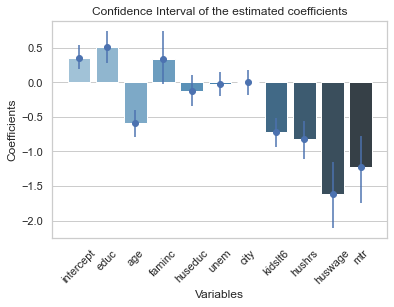

In [181]:
# Visualize the results
sns.set(style="whitegrid")
ax = sns.barplot(x=CI.index, y=CI['estimation'], palette="Blues_d")
ax.errorbar(CI.index, CI['estimation'], yerr=[CI['estimation'] - CI['Lower'], CI['Upper'] - CI['estimation']], fmt='o')
ax.set_title('Confidence Interval of the estimated coefficients')
ax.set_ylabel('Coefficients')
ax.set_xlabel('Variables')
ax.set_xticklabels(CI.index, rotation=45)

In [167]:
X = mroz[['educ']]
Z = mroz[['motheduc', 'fatheduc']]
# W = mroz['faminc']
W = None
Y = mroz[['inlf']]
# V = mroz[['kidslt6', 'kidsge6', 'age', 'hushrs', 'husage', 'huseduc', 'huswage', 'mtr', 'city', 'exper']]
# Remove confounders: age, huseduc, city, faminc
covar = [x for x in covar if x not in confounders]
# covar = ['kidslt6', 'hushrs', 'huswage', 'mtr']
V = mroz[covar]

scaler = StandardScaler()
V = scaler.fit_transform(V)
V = pd.DataFrame(V, columns=covar)
X = scaler.fit_transform(X)
X = pd.DataFrame(X.reshape(-1, 1), columns=['educ'])
Z = scaler.fit_transform(Z)
Z = pd.DataFrame(Z, columns=['motheduc', 'fatheduc'])

Var_names = ['intercept','educ', 'confounder_hat']
Var_names.extend(V.columns)

resiv = ResIV()
resiv.fit(X, Y, Z, V)
resiv_result = pd.DataFrame(resiv.coef, columns=Var_names)

lg = LogisticRegression()
lg.fit(np.concatenate([X, V], axis=1), np.array(Y).ravel())

Var_names = ['intercept', 'educ']
Var_names.extend(V.columns)

results = np.concatenate((lg.intercept_.reshape(1, -1), lg.coef_.reshape(1, -1)), axis=1)
OLG_result = pd.DataFrame(results, columns=Var_names)

tsls = Multivar_TSLS()
tsls.fit(X, Y, Z, V)
tsls_result = pd.DataFrame(tsls.coef, columns=Var_names)

GMM = Multivar_GMM()
GMM.fit(X, Y, Z, V)
GMM_result = pd.DataFrame(GMM.coef.reshape(1, -1), columns=Var_names)

# # Merge all results
# comparasion = pd.concat([OLG_result.T, tsls_result.T, GMM_result.T, resiv_result.T], axis=1)
# comparasion.columns = ['OLG', 'TSLS', 'GMM', 'ResIV']
# comparasion.plot(kind='bar', figsize = (12, 8),title='Comparasion of different methods')
# comparasion